<a href="https://colab.research.google.com/github/atharvaK718/Exploratory-Data-Analysis/blob/main/6.Module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries and Dataset

In [12]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

In [14]:
# Load the dataset
df = pd.read_csv("/content/catholic.csv")

# Dimensionality Reduction

In [15]:
columns_for_reduction = ['read12', 'math12', 'motheduc']
df_subset = df[columns_for_reduction]

# PCA

In [16]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_subset)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

# Plotting PCA results

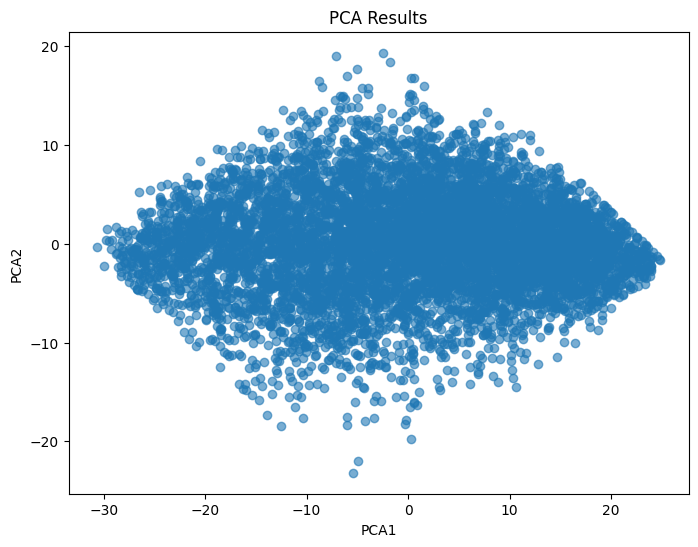

In [17]:
# Plotting PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.6)
plt.title("PCA Results")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

# MDS

In [18]:
df_sample = df_subset.sample(n=1000, random_state=42)
distance_matrix = pairwise_distances(df_sample)

mds = MDS(n_components=2, dissimilarity='precomputed', n_init=1, max_iter=300)
mds_result = mds.fit_transform(distance_matrix)
df_sample['MDS1'], df_sample['MDS2'] = mds_result[:, 0], mds_result[:, 1]

# Plotting MDS results

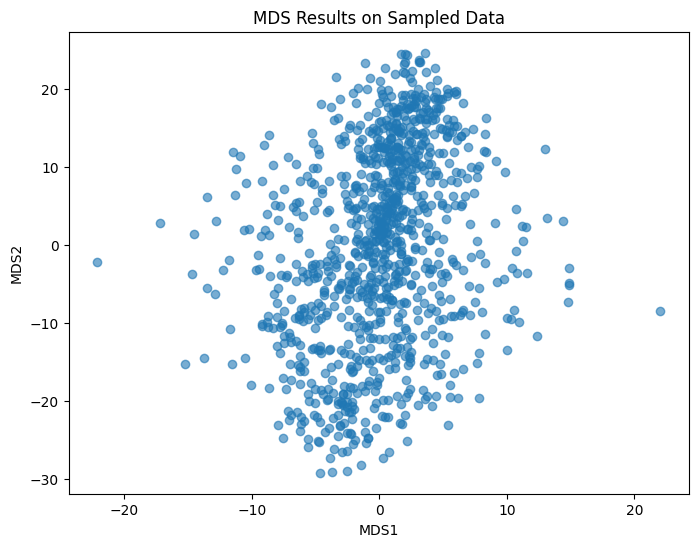

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df_sample['MDS1'], df_sample['MDS2'], alpha=0.6)
plt.title("MDS Results on Sampled Data")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.show()

# t-SNE (t-distributed stochastic neighbor embedding)

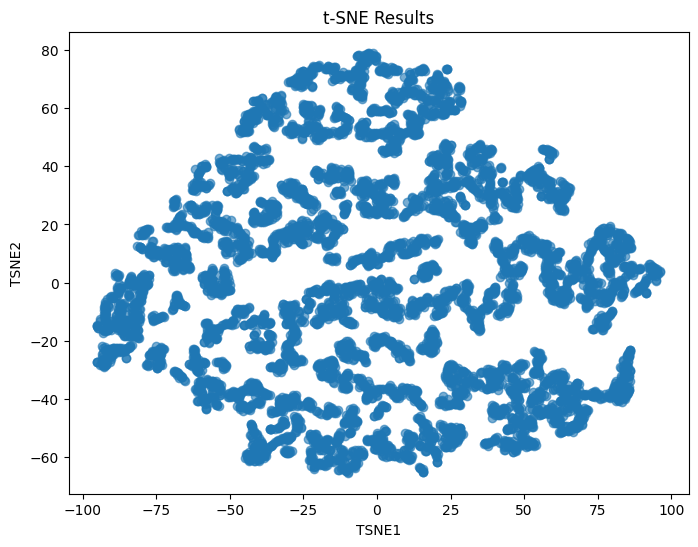

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_subset)
df['TSNE1'], df['TSNE2'] = tsne_result[:, 0], tsne_result[:, 1]

# Plotting t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(df['TSNE1'], df['TSNE2'], alpha=0.6)
plt.title("t-SNE Results")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

# Self-Organizing Maps (SOMs)

In [21]:
columns_for_som = ['read12', 'math12', 'motheduc']  # Replace with the columns you want to use
df_subset = df[columns_for_som]
scaler = MinMaxScaler()
data = scaler.fit_transform(df_subset)

In [22]:
# SOM Parameters
som_size = (10, 10)  # Adjust grid size as needed; larger size gives more granularity
som = MiniSom(som_size[0], som_size[1], input_len=data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
som.train_random(data, 100)  # Number of iterations can be increased for more thorough training

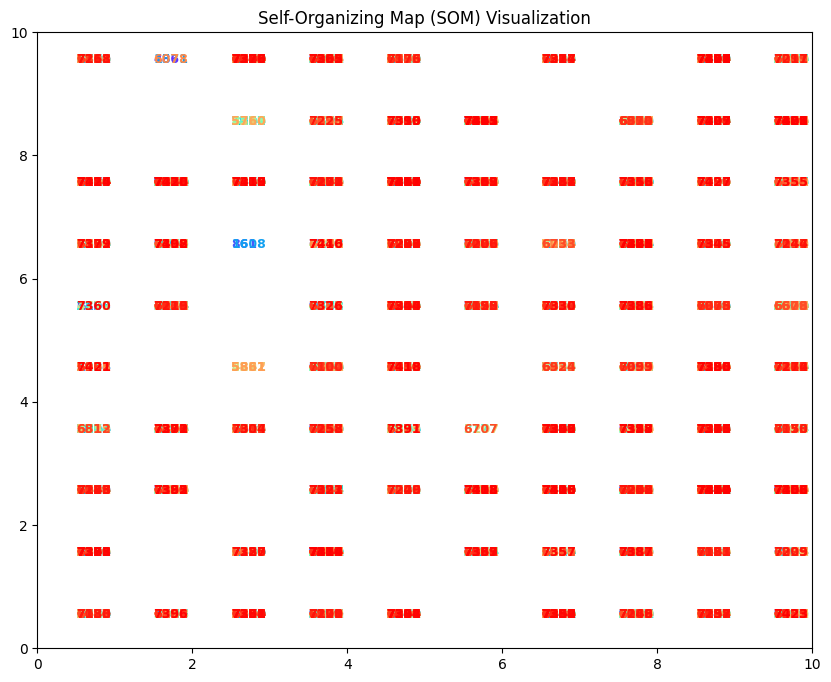

In [23]:
# Plotting the SOM results
plt.figure(figsize=(10, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Get the winning node for each data point
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i),
             color=plt.cm.rainbow(i / len(data)),
             fontdict={'weight': 'bold', 'size': 9})

plt.title("Self-Organizing Map (SOM) Visualization")
plt.xlim([0, som_size[0]])
plt.ylim([0, som_size[1]])
plt.show()